## functions in util module

In [1]:
# merging new's (movieID, title) with old's title so that detailed roles (crew information which old data seem to have??) can be added.
# cinemagoer can be used for teh new's template ia.getmovieID()?

In [1]:
import os
import string
import pandas as pd
from src.match_format import set_dir_moviedata
from src.join_filter import movie, person, movie_person, join_movie
from src.check_consistent import print_shape, multi_col_unique, movie_compare
import numpy as np
from imdb import Cinemagoer
# import os
# os.chdir(os.getcwd() + "/data/movie")
# test data: old_movie = pd.read_pickle('data/movie/old_movie.pkl')
set_dir_moviedata()

## Movie titles
- what is in old but not in new
- what is in new but not in old
how to compare strings with string?

In [4]:
# filter out pilot, finale titles, filter in region == us, type == movie
#movie()

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/durable_dominance/cont_code/src/join_filter.py:82: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'year'] = df.year.apply(lambda x: int(x) if str(x).isnumeric() else -1)


In [3]:
old_movie = pd.read_pickle('old_movie_year_title.pkl')
new_movie = pd.read_pickle('new_movie_year_title_typemovie.pkl').drop(['region'], axis = 1)

In [16]:
print_shape(old_movie, new_movie)
new_movie

,titleId,title,year,titleType
20,tt0000009,Miss Jerry,1894,movie
1165,tt0000574,The Story of the Kelly Gang,1906,movie
1372,tt0000679,The Fairylogue and Radio-Plays,1908,movie
2104,tt0001038,Sherlock Holmes VI,1910,movie
2231,tt0001101,Abraham Lincoln's Clemency,1910,movie
...,...,...,...,...
11577017,tt9914642,Albatross,2017,movie
11577021,tt9914644,9/11: Escape from the Towers,2018,movie
11577123,tt9914828,The War of Godzilla,2015,movie
11577207,tt9914972,Blind Ambition,2021,movie


In [5]:
# make movie title and year as old_id
old_movie = multi_col_unique(old_movie)

# join and save result in mo, mi tsv
join_movie(old_movie, new_movie)

In [6]:
old_movie

,old_id,title,year
0,OLD0,Cristián Campos,2010
1,OLD1,Life & Death,2013
2,OLD2,Disguise for Murder,2001
3,OLD3,Anniversary,1971
4,OLD4,Angus Black/Lester Barrie/DC Curry,2009
...,...,...,...
2545514,OLD2417448,The Vanquished,1953
2545518,OLD2545518,V poiskakh kapitana Granta,1985
2545524,OLD1549795,Winterwatch,2012
2545525,OLD2545525,The Payoff,1942


In [100]:
mo = pd.read_csv("mo.tsv", sep='\t', low_memory = False, index_col='index') #pd.merge(old_movie, new_movie, on = ('title', 'year'), how = 'inner')
mi = pd.read_csv("mi.tsv", sep='\t', low_memory = False, index_col = 'old_id') #pd.merge(old_movie, new_movie, on = ('title', 'year'), how = 'outer')

In [101]:
mi #90k

,titleId,title,year
old_id,,,
OLD60,tt0808541,Winter,2006
OLD218,tt0970184,Operation Homecoming: Writing the Wartime Expe...,2007
OLD2120,tt1819776,Virus,2011
OLD2185,tt1564349,Dolphin Tale,2011
OLD2216,tt2133340,The Foreigner,2011
...,...,...,...
OLD2544715,tt0097994,Nobody's Perfect,1990
OLD2544825,tt0034166,Secret of the Wastelands,1941
OLD2544845,tt0021078,Little Accident,1930


In [102]:
mi_drop = mi.reset_index().drop_duplicates('old_id')
print(mi.shape[0] - mi_drop.shape[0])

402


In [7]:
new_columns = ['titleId', 'title', 'year', 'region', 'titleType']
new_movie_raw = pd.read_pickle('new_movie.pkl').loc[:, new_columns]
df = new_movie_raw
df['titleType'].unique()
# 1. gene

array(['short', 'movie', 'tvSeries', 'tvShort', 'tvMovie', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [14]:
old_movie

,old_id,title,year
0,OLD0,Cristián Campos,2010
1,OLD1,Life & Death,2013
2,OLD2,Disguise for Murder,2001
3,OLD3,Anniversary,1971
4,OLD4,Angus Black/Lester Barrie/DC Curry,2009
...,...,...,...
2545514,OLD2417448,The Vanquished,1953
2545518,OLD2545518,V poiskakh kapitana Granta,1985
2545524,OLD1549795,Winterwatch,2012
2545525,OLD2545525,The Payoff,1942


In [ ]:
join_movie

In [15]:
new_movie_raw

,titleId,title,year,region,titleType
0,tt0000001,Carmencita,1894,DE,short
1,tt0000001,Carmencita,1894,US,short
2,tt0000001,Carmencita,1894,\N,short
3,tt0000002,Le clown et ses chiens,1892,\N,short
4,tt0000002,Le clown et ses chiens,1892,FR,short
...,...,...,...,...,...
11578178,tt9916850,Episode #3.19,2010,NaN,tvEpisode
11578179,tt9916852,Episode #3.20,2010,NaN,tvEpisode
11578180,tt9916856,The Wind,2015,DE,short
11578181,tt9916856,The Wind,2015,\N,short


In [12]:
df_all.titleType.unique()

array(['movie'], dtype=object)

In [39]:
mo #1.7m

,old_id,title,year,titleId
index,,,,
0,OLD0,Cristián Campos,2010,NaN
1,OLD1,Life & Death,2013,NaN
2,OLD2,Disguise for Murder,2001,NaN
3,OLD3,Anniversary,1971,NaN
4,OLD4,Angus Black/Lester Barrie/DC Curry,2009,NaN
...,...,...,...,...
1780098,NaN,Albatross,2017,tt9914642
1780099,NaN,9/11: Escape from the Towers,2018,tt9914644
1780100,NaN,The War of Godzilla,2015,tt9914828


In [88]:
except_old_only = mo[~mo.titleId.isnull()] #170k
except_old_only

,old_id,title,year,titleId
index,,,,
44,OLD60,Winter,2006,tt0808541
127,OLD218,Operation Homecoming: Writing the Wartime Expe...,2007,tt0970184
1245,OLD2120,Virus,2011,tt1819776
1275,OLD2185,Dolphin Tale,2011,tt1564349
1295,OLD2216,The Foreigner,2011,tt2133340
...,...,...,...,...
1780098,NaN,Albatross,2017,tt9914642
1780099,NaN,9/11: Escape from the Towers,2018,tt9914644
1780100,NaN,The War of Godzilla,2015,tt9914828


             old_id                               title  year titleId
index                                                                
0              OLD0                     Cristián Campos  2010     NaN
1              OLD1                        Life & Death  2013     NaN
2              OLD2                 Disguise for Murder  2001     NaN
3              OLD3                         Anniversary  1971     NaN
4              OLD4  Angus Black/Lester Barrie/DC Curry  2009     NaN
...             ...                                 ...   ...     ...
1704815  OLD2545510   The Second Part of Henry the Sixt  1983     NaN
1704816  OLD2545513                   Western Spaghetti  2009     NaN
1704817  OLD2545518          V poiskakh kapitana Granta  1985     NaN
1704818  OLD2545525                          The Payoff  1942     NaN
1704819  OLD2545530                    Tomorrow's Youth  1935     NaN

[1611538 rows x 4 columns]


<AxesSubplot: >

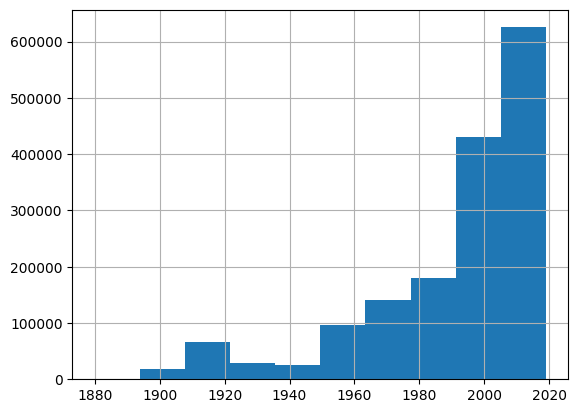

In [93]:
old_only = mo[mo.titleId.isnull()] # 1.6m is old\new 1673488 - series, short,
print(old_only) #Acampamento de Férias 3, many ... (might have to visit a.k.a. but quality is not good)
old_only.year.hist()

In [105]:
new_only.to_csv("new.tsv", sep = '\t')
old_only.to_csv("old.tsv", sep = '\t')

        old_id                         title  year    titleId
index                                                        
1704820    NaN  From the Manger to the Cross  1912  tt0002199
1704821    NaN    What 80 Million Women Want  1913  tt0002822
1704822    NaN             A Boy and the Law  1913  tt0003693
1704823    NaN        The Colosseum in Films  1914  tt0003780
1704824    NaN          The Man o' War's Man  1914  tt0004299
...        ...                           ...   ...        ...
1780098    NaN                     Albatross  2017  tt9914642
1780099    NaN  9/11: Escape from the Towers  2018  tt9914644
1780100    NaN           The War of Godzilla  2015  tt9914828
1780101    NaN                Blind Ambition  2021  tt9914972
1780102    NaN                     Safeguard  2020  tt9916190

[75283 rows x 4 columns]


<AxesSubplot: >

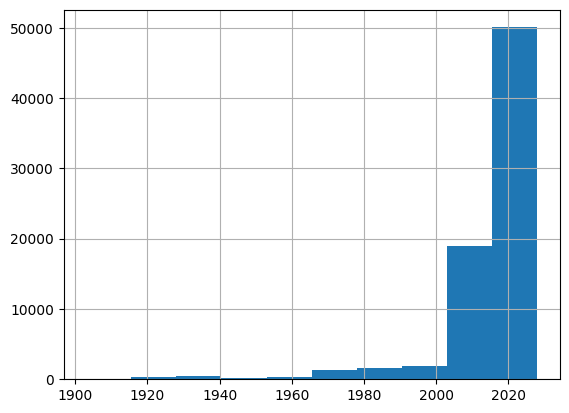

In [94]:
new_only = mo[mo.old_id.isnull()] # 75k is new\old 75544 - after 2017
print(new_only)
new_only.year.hist()

In [90]:
print(old_only.shape[0], except_old_only.shape[0], old_only.shape[0] + except_old_only.shape[0])
print(mo.shape[0])

1611538 168565 1780103
1780103


In [99]:
np.sort(mi.year.unique())[[0, -1]] # # 1894 ~ 2016
np.sort(mo.year.unique())[[0, -1]] # 1880 ~ 2028!!

array([1880, 2028])

In [17]:
old_only

,index,old_id,title,year,titleId
0,0,OLD0,Cristián Campos,2010,NaN
1,1,OLD1,Life & Death,2013,NaN
2,2,OLD2,Disguise for Murder,2001,NaN
3,3,OLD3,Anniversary,1971,NaN
4,4,OLD4,Angus Black/Lester Barrie/DC Curry,2009,NaN
...,...,...,...,...,...
1704815,1704815,OLD2545510,The Second Part of Henry the Sixt,1983,NaN
1704816,1704816,OLD2545513,Western Spaghetti,2009,NaN
1704817,1704817,OLD2545518,V poiskakh kapitana Granta,1985,NaN
1704818,1704818,OLD2545525,The Payoff,1942,NaN


In [18]:
new_only

,index,old_id,title,year,titleId
1704820,1704820,NaN,From the Manger to the Cross,1912,tt0002199
1704821,1704821,NaN,What 80 Million Women Want,1913,tt0002822
1704822,1704822,NaN,A Boy and the Law,1913,tt0003693
1704823,1704823,NaN,The Colosseum in Films,1914,tt0003780
1704824,1704824,NaN,The Man o' War's Man,1914,tt0004299
...,...,...,...,...,...
1780098,1780098,NaN,Albatross,2017,tt9914642
1780099,1780099,NaN,9/11: Escape from the Towers,2018,tt9914644
1780100,1780100,NaN,The War of Godzilla,2015,tt9914828
1780101,1780101,NaN,Blind Ambition,2021,tt9914972


In [107]:
new_only[new_only.year == 2000]

,old_id,title,year,titleId
index,,,,
1706725,NaN,The Fantasticks,2000,tt0113026
1706839,NaN,Pushing the Envelope,2000,tt0119966
1706870,NaN,The Elf Who Didn't Believe,2000,tt0123055
1707029,NaN,Fallen Arches,2000,tt0133752
1707241,NaN,Secrets of a Chambermaid,2000,tt0155150
...,...,...,...,...
1777210,NaN,The Best of Backyard Wrestling 2: More Hardcor...,2000,tt9066486
1777912,NaN,Great White Shark: Truth Behind the Legend,2000,tt9242918
1778492,NaN,Split Second,2000,tt9404778


In [111]:
old_only[old_only.year == 2000]

,old_id,title,year,titleId
index,,,,
49,OLD67,Evasión o victoria,2000,NaN
91,OLD150,Abenteuer Auto,2000,NaN
92,OLD151,Letra pequeña,2000,NaN
108,OLD180,War and Pieces,2000,NaN
150,OLD261,Teen Out of Time,2000,NaN
...,...,...,...,...
1704134,OLD2543525,Battlefield Earth: A Saga of the Year 3000,2000,NaN
1704283,OLD2544043,Blinker,2000,NaN
1704529,OLD2544677,Nag la bombe,2000,NaN


In [110]:
mi[mi.year == 2000]

,titleId,title,year
old_id,,,
OLD10732,tt0176783,Gossip,2000
OLD10732,tt0238251,Gossip,2000
OLD32744,tt0242337,Bunny,2000
OLD71971,tt0241297,Chaos Theory,2000
OLD87714,tt0194410,The Stray,2000
...,...,...,...
OLD2539423,tt0205526,Wildflower,2000
OLD2539820,tt2307054,Watch,2000
OLD2541710,tt0215366,Written in Water,2000


In [ ]:
# 1980, 1990, 2000 (remove old_only, old\new; filtering빼고  old-id - new-id -genre - filtering)

## Person

In [9]:
new_person = person()

In [15]:
old_person

,id,name,imdbIndex,imdbId,gender,namePcodeCf,namePcodeNf,surnamePcode,md5sum
0,451,"A., David",NaN,NaN,m,A313,D13,A,cf45e7b42fbc800c61462988ad1156d2
1,129,"-Alverio, Esteban Rodriguez",NaN,NaN,m,A4162,E2315,A416,f5c410bff6839b545d04c531f776e8f2
2,1688,"Abbas, Athar",NaN,NaN,m,A1236,A3612,A12,cf230f6ed718a330dc688c20b8d741d3
3,3631,"Aberer, Leo",NaN,NaN,m,A164,L16,A16,05684f16b84db387e613d3de57eca5b7
4,512,A.J.,II,NaN,m,A2,NaN,NaN,c63baf59b537e471b6ec4b68c5d1373e
...,...,...,...,...,...,...,...,...,...
4193671,4193674,"Öndemir, Önder",NaN,NaN,NaN,N3565,N3653,N356,4aaaea8e689c667e6f34023f16db5481
4193672,4193676,"Özgür, Lale",NaN,NaN,NaN,Z264,L426,Z26,0b7c397c3605fdc0afbf8220061c1579
4193673,4193670,"Ôta, Akemi",NaN,NaN,NaN,T25,A253,T,ce24ccbc6f95737710b925cd66722d06
4193674,4193675,"Östling, Kia",NaN,NaN,NaN,S3452,K2345,NaN,8c8b06b41b1639845317b12613b0a95b


In [12]:
pmc_raw

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,ordering,category,job,characters
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0025164,1,actor,\N,"[""Guy Holden""]"
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0026942,2,actor,\N,"[""Huck Haines""]"
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0027125,1,actor,\N,"[""Jerry Travers""]"
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0027630,1,actor,\N,"[""Bake Baker""]"
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0028333,1,actor,\N,"[""Lucky Garnett""]"
...,...,...,...,...,...,...,...,...,...,...,...
52467457,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15186906,6,writer,\N,\N
52467458,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15187068,6,writer,\N,\N
52467459,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15204446,6,writer,\N,\N
52467460,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744,tt8736744,7,cinematographer,\N,\N


In [22]:
pmc.

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
52475552,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
52475553,tt9916880,5,nm0996406,director,principal director,\N
52475554,tt9916880,6,nm1482639,writer,\N,\N
52475555,tt9916880,7,nm2586970,writer,books,\N


In [27]:
pmc

,nconst,tconst,category,characters
0,nm0000001,tt0025164,actor,"[""Guy Holden""]"
1,nm0000001,tt0026942,actor,"[""Huck Haines""]"
2,nm0000001,tt0027125,actor,"[""Jerry Travers""]"
3,nm0000001,tt0027630,actor,"[""Bake Baker""]"
4,nm0000001,tt0028333,actor,"[""Lucky Garnett""]"
...,...,...,...,...
52467412,nm9993708,tt14508814,actress,"[""Extra""]"
52467415,nm9993708,tt21028920,actress,\N
52467420,nm9993709,tt11702702,actress,"[""Observant Poet""]"
52467423,nm9993709,tt11772842,actress,"[""Lu""]"


In [104]:


old_person.columns = ['id', 'personID','infoTypeID','info', 'note']

In [109]:
old_person = pd.read_pickle("old_person.pkl")
#new_person = pd.read_pickle('new_person_basics.p6yhn     kl')

In [9]:
new_person_movie = pd.read_pickle('test.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'test.pkl'

In [22]:
os.getcwd()

'/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/data/movie'

In [18]:
old_person.columns = ['id', 'name', 'imdbIndex', 'imdbId', 'gender', 'namePcodeCf', 'namePcodeNf', 'surnamePcode', 'md5sum']
old_person[['id', 'name']] #4m

,id,name
0,451,"A., David"
1,129,"-Alverio, Esteban Rodriguez"
2,1688,"Abbas, Athar"
3,3631,"Aberer, Leo"
4,512,A.J.
...,...,...
4193671,4193674,"Öndemir, Önder"
4193672,4193676,"Özgür, Lale"
4193673,4193670,"Ôta, Akemi"
4193674,4193675,"Östling, Kia"


In [10]:
pd.read_csv("cast_info.csv").to_pickle("old_cast_info.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'cast_info.csv'

In [1]:
pd.read_csv("data/movie/new_movie_princ.pkl")

NameError: name 'pd' is not defined

In [19]:
new_person.rename(columns = {'primaryName': 'name', 'birthYear': 'year'}, inplace=True)

In [20]:
new_person

,nconst,name,year,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0069467,tt0060827"
...,...,...,...,...,...,...
11988018,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
11988019,nm9993716,Essias Loberg,\N,\N,NaN,\N
11988020,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11988021,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


## Cinemagoer

In [383]:
people = ia.search_person('Mel Gibson')
for person in people:
   print(person.personID, person['name'])
person = ia.get_person('0000206')
print(person)

0000154 Mel Gibson
12550288 Mel Gibson
2153167 Mel Gibson
0317112 Mel Gibson
3323885 Adam Taylor
2800055 Mel Gibson
3742421 Melina Mari Bryant   nickname
0317195 Terel Gibson
0316945 Donal Gibson
4047961 Noel Gibson
0316878 Cal Gibson
13996602 Joel Gibson
3912400 Jamel Gibson
2106809 Raquel Gibson
0316950 E.L. Gibson
12479102 Gel Gibson
2798174 Daniel Gibson
6928816 Christel Gibson
0316915 Daniel Gibson
1863978 Ethel Gibson
